In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
from scipy.optimize import minimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
return_m = pd.read_csv("data/Return.csv",
                     header = 0, index_col = 0, parse_dates = True, na_values = -99.99
                     )
return_m.index = pd.to_datetime(return_m.index, format="%Y%m").to_period('M')
return_m.columns = return_m.columns.str.strip()
return_m = return_m[['SP500','MSCI_EM_Return','MSCI_EU_Return','SovDebtReturn','Global_Agg_Return','Gold_Return']]
return_m.head()

,SP500,MSCI_EM_Return,MSCI_EU_Return,SovDebtReturn,Global_Agg_Return,Gold_Return
Date,,,,,,
2011-07,-0.020,-0.004,-0.034,0.018,0.011,0.084
2011-08,-0.054,-0.089,-0.100,0.000,0.012,0.123
2011-09,-0.070,-0.146,-0.110,-0.044,0.006,-0.114
2011-10,0.109,0.132,0.121,0.044,-0.001,0.063
2011-11,-0.002,-0.067,-0.045,-0.009,-0.005,0.013


In [15]:
er = erk.annualize_rets(return_m,12)
cov=return_m.cov()

In [16]:
erk.gmv(cov)

array([4.06008293e-02, 9.24838878e-14, 0.00000000e+00, 2.02790261e-13,
       9.59399198e-01, 4.06604813e-13])

<AxesSubplot:xlabel='Volatility'>

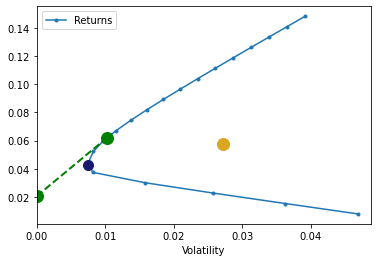

In [17]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate=0.0205, show_ew=True, show_gmv=True)